### Distribution of female heights

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. We answer the following questions:
1. what is the probability that she is 5 feet or shorter?
2. what is the probability that she is 6 feet or taller?
3. what is the probability that she is between 61 and 67 inches?

In [7]:
#information about the distribution of female heights
female_avg <- 64
female_sd <- 3

#CDF for female heights
female_dist <- function(a){pnorm(a,female_avg,female_sd)}

female_dist(5*12)
1 - female_dist(6*12)
female_dist(67) - female_dist(61)

[1] 0.09121122

[1] 0.003830381

[1] 0.6826895

Compute the probability that the height of a randomly chosen female is within 1 SD from the average height.

In [9]:
female_dist(female_avg+female_sd) - female_dist(female_avg-female_sd)

### Distribution of male heights

Imagine the distribution of male adults is approximately normal with an average of 69 inches and a standard deviation of 3 inches. How tall is a male in the 99th percentile?

In [10]:
male_avg <- 69
male_sd <- 3
qnorm(0.99,male_avg,male_sd)

[1] 75.97904

### Distribution of IQ scores

The distribution of IQ scores is approximately normally distributed. The average is 100 and the standard deviation is 15. Suppose you want to know the distribution of the person with the highest IQ in your school district, where 10,000 people are born each year.

Generate 10,000 IQ scores 1,000 times using a Monte Carlo simulation. Make a histogram of the highest IQ scores.

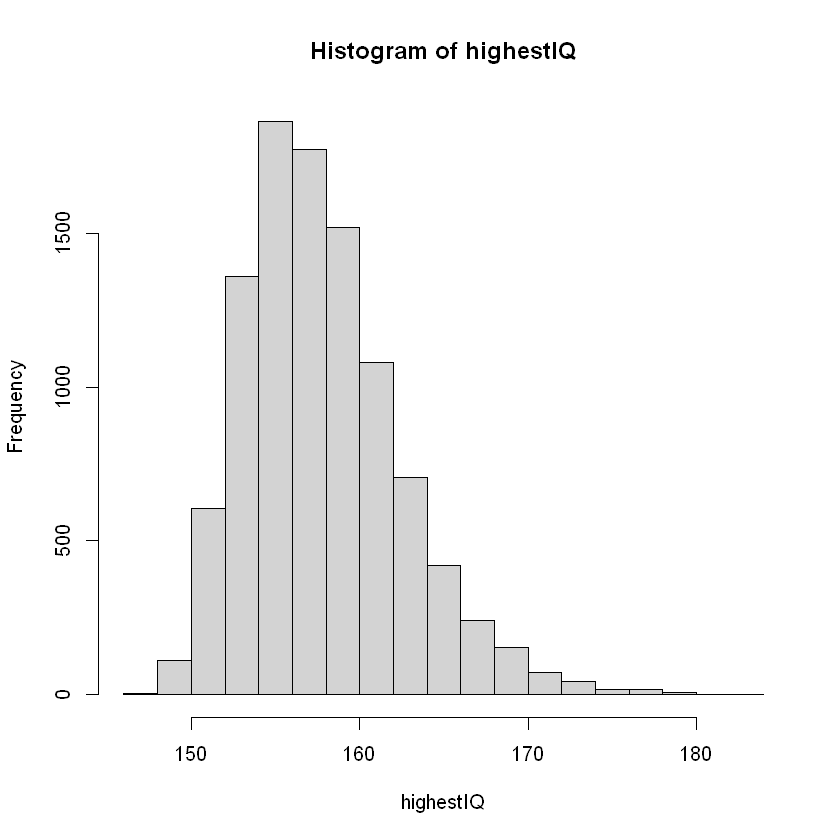

In [11]:
B <- 10000
set.seed(1)
highestIQ <- replicate(B, {simulated_IQ <- rnorm(10000,100,15)
    max(simulated_IQ)})
hist(highestIQ)

### ACT scores

The ACT is a standardized college admissions test used in the United States. The four multi-part questions in this assessment all involve simulating some ACT test scores and answering probability questions about them.

For the three year period 2016-2018, ACT standardized test scores were approximately normally distributed with a mean of 20.9 and standard deviation of 5.7. (Real ACT scores are integers between 1 and 36, but we will ignore this detail and use continuous values instead.)

**Simulation**. First we'll simulate an ACT test score dataset and answer some questions about it.

Set the seed to 16, then use $\verb|rnorm|()$ to generate a normal distribution of 10000 tests with a mean of 20.9 and standard deviation of 5.7. Save these values as $\verb|act_scores|$. You'll be using this dataset throughout these four multi-part questions.

In [35]:
set.seed(16)
act_scores <- rnorm(10000, 20.9, 5.7)

Now we compute some basic statistic value of the previous simulation.

In [36]:
mean_act <- mean(act_scores); print(paste("mean of act scores is", mean_act))
sd_act <- sd(act_scores); print(paste("standard deviation of act scores is", sd_act))

[1] "mean of act scores is 20.8401214295426"
[1] "standard deviation of act scores is 5.67523700598245"


In [31]:
perfect_act <- sum(act_scores>=36); print(paste("number of perfect scores which >=36 is", perfect_act))

[1] "number of perfect scores which >=36 is 41"


In [34]:
print(paste("probability of an ACT score greater than 30 is", mean(act_scores>30)))
print(paste("probability of an ACT score less than or equal to 10 is", mean(act_scores<=10)))

[1] "probability of an ACT score greater than 30 is 0.0527"
[1] "probability of an ACT score less than or equal to 10 is 0.0282"


**Plotting**. Plot the probability density.

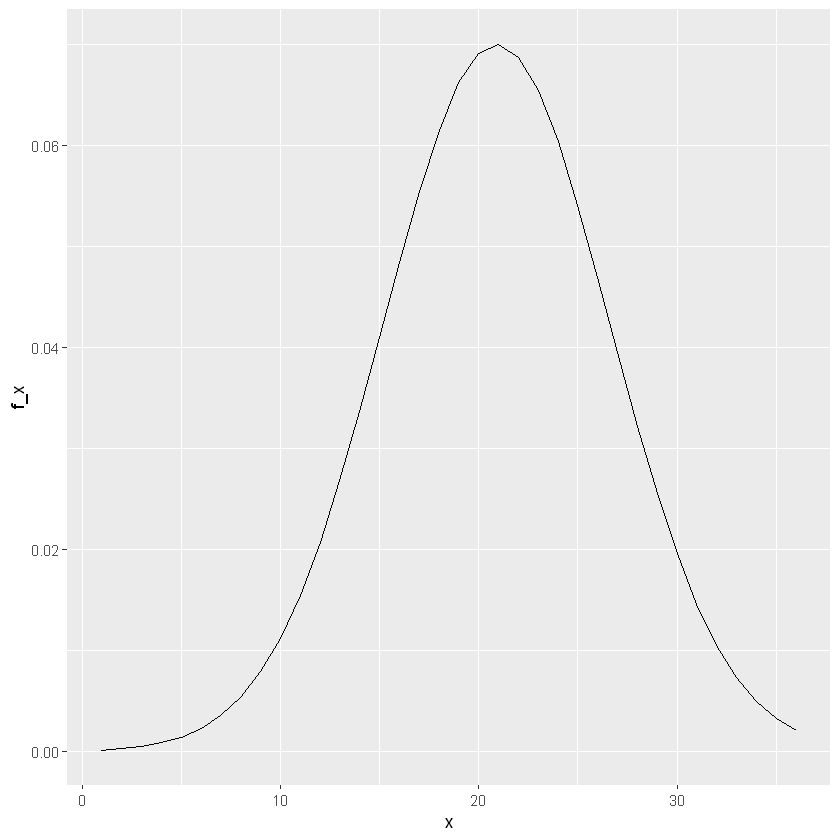

In [45]:
library(dplyr)
library(ggplot2)
x <- seq(1,36,1)
data.frame(x,f=dnorm(x,20.9,5.7)) %>% ggplot(aes(x,f_x)) + geom_line()

**Convert act_scores to Z-scores**

In [46]:
z_scores <- (act_scores-mean_act)/sd_act

In [76]:
print(paste("probability of a Z-score greater than 2 is",mean(z_scores>=2)))
print(paste("ACT score value corresponds to 2 SD above the mean is", mean_act+2*sd_act))
print(paste("the 97.5th percentile of act_scores", qnorm(0.975,mean_act,sd_act)))

[1] "probability of a Z-score greater than 2 is 0.0233"
[1] "ACT score value corresponds to 2 SD above the mean is 32.1905954415075"
[1] "the 97.5th percentile of act_scores 31.9633815649971"


**Function to create a CDF for ACT scores**

In [58]:
cdf_act <- function(x){
    mean(act_scores<=x)
}

Apply this function to the range 1 to 36.

In [77]:
library(BBmisc)
library(tidyverse)
x <- seq(1,36,1)
cdf_value <- sapply(x,cdf_act)
print(paste("the minimum integer score such that CDF value is at least 0.95 is", 
            x[which.first(cdf_value>=0.95, use.names = TRUE)])) 
print(paste("the expected 95th percentile is", qnorm(0.95,20.9,5.7)))

[1] "the minimum integer score such that CDF value is at least 0.95 is 31"
[1] "the expected 95th percentile is 30.2756656736234"


In [86]:
p <- seq(0.01, 0.99, 0.01)
sample_quantiles <- quantile(act_scores,p)
print(paste("the percentile of a score of 26 is", 
            100*p[which.first(sample_quantiles>26, use.names=TRUE)]-1))

[1] "the percentile of a score of 26 is 82"


Make a corresponding set of theoretical quantiles using $\verb|qnorm|()$ over the interval $\verb|p <- seq(0.01, 0.99, 0.01)|$ with mean $20.9$ and standard deviation $5.7$. Make a QQ-plot graphing $\verb|sample_quantiles|$ on the y-axis versus $\verb|theoretical_quantiles|$ on the x-axis.

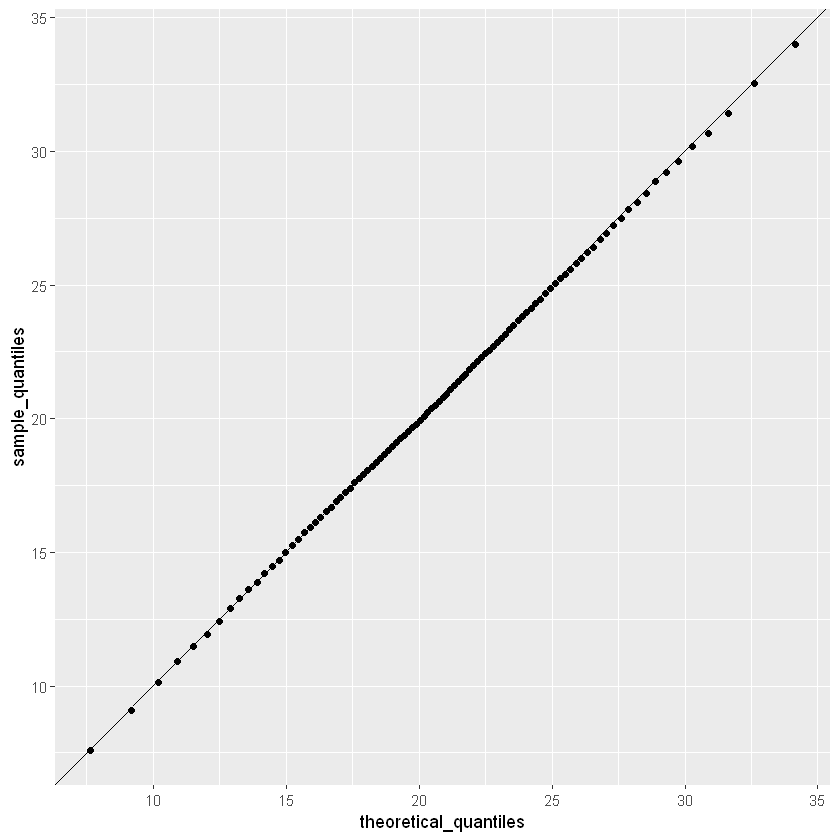

In [89]:
theoretical_quantiles <- qnorm(p,20.9,5.7)
qplot(theoretical_quantiles, sample_quantiles) + geom_abline()